In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from tqdm import tqdm

In [9]:
df = pd.read_csv('WPRT_final.csv')
df = df.drop('date',axis = 1)

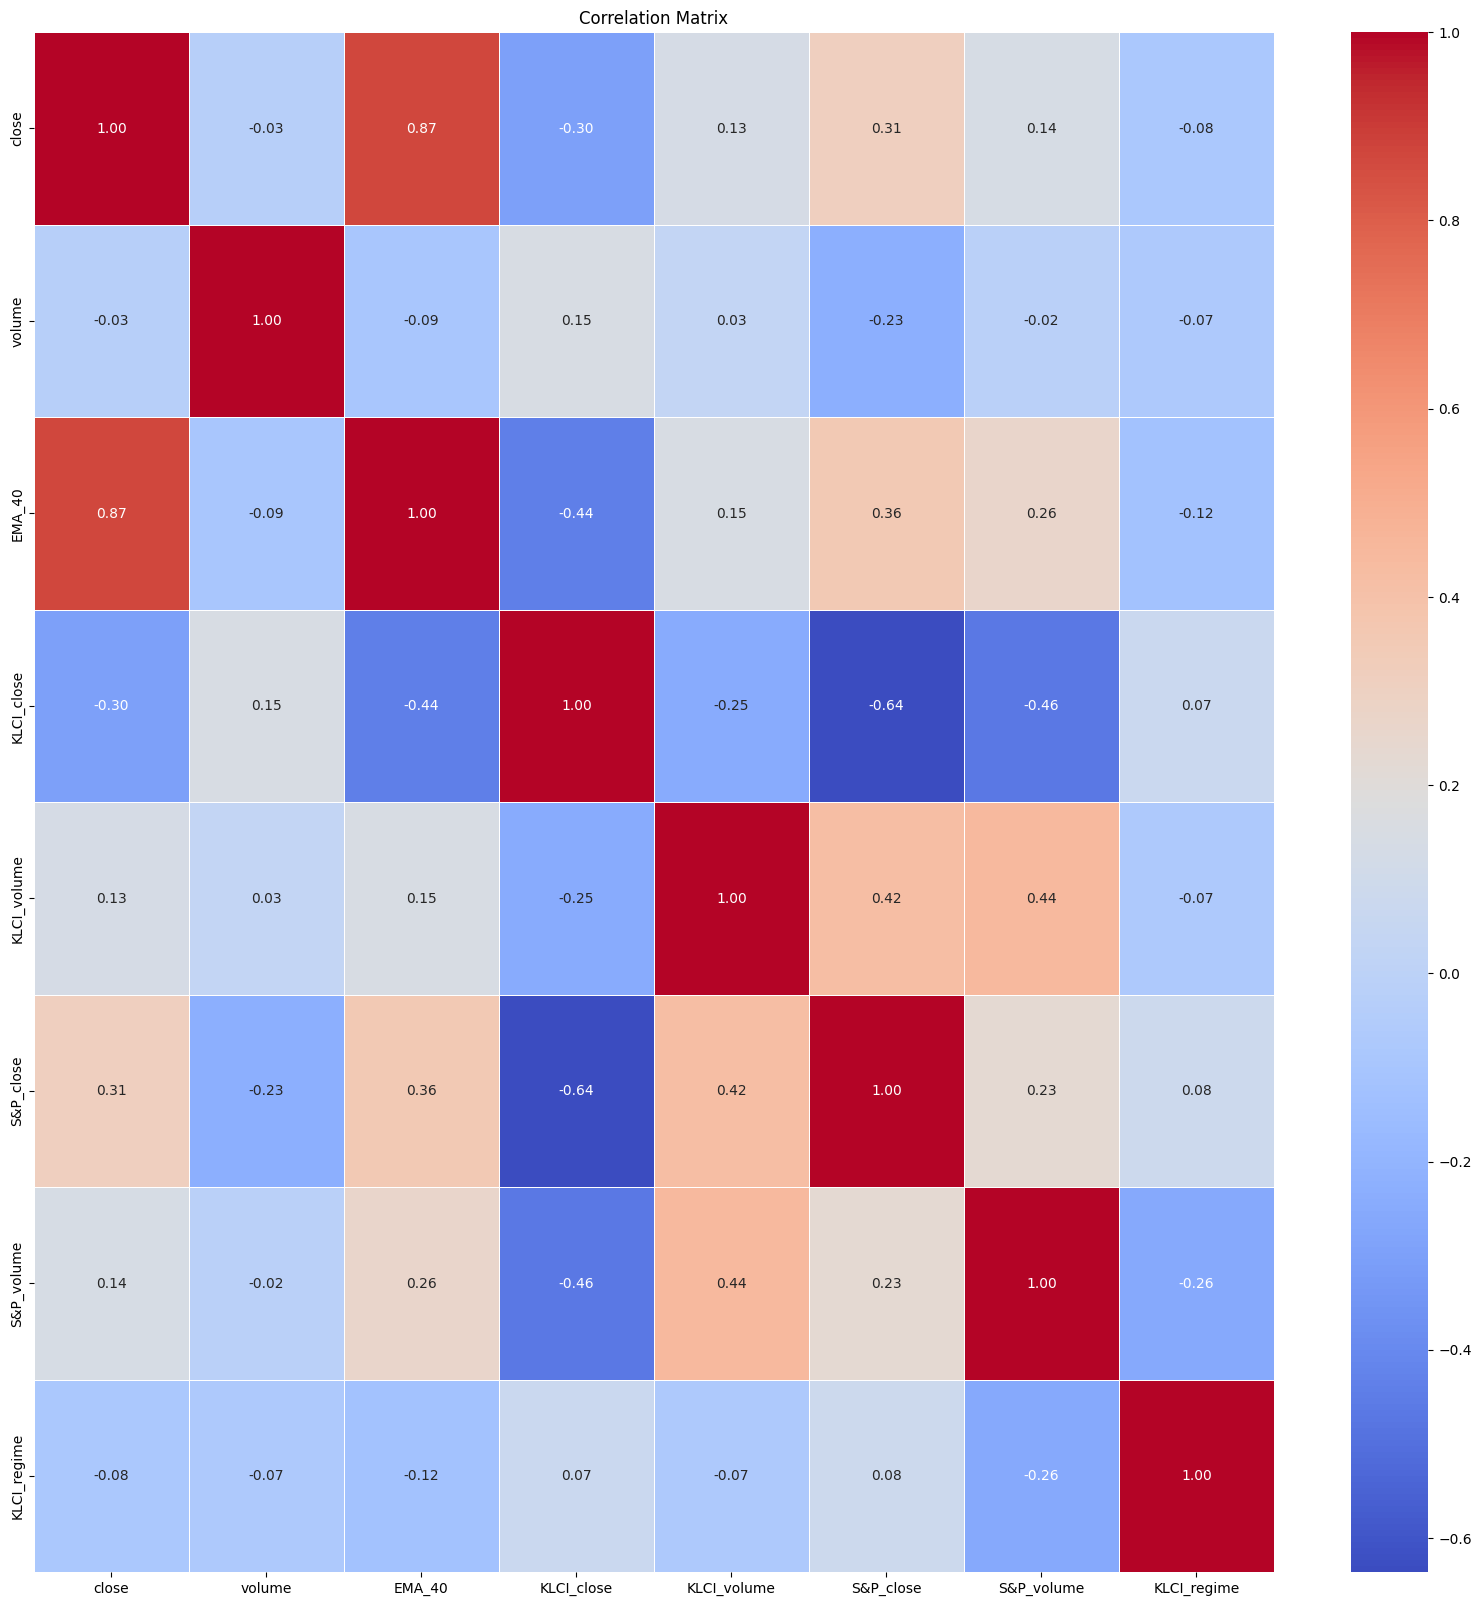

In [10]:
# Correlation matrix to show dependencies
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('heatmap.png')
plt.show()

In [14]:
df.dtypes
df.head()

,close,volume,EMA_40,KLCI_close,KLCI_volume,S&P_close,S&P_volume,KLCI_regime
0,2.65,202614300,2.650000,1799.589966,442574600,1744.500000,16512980000,1
1,2.53,129542400,2.588500,1817.569946,626234900,1759.770020,17464350000,1
2,2.55,34529500,2.575020,1810.410034,633393500,1761.640015,17676620000,1
3,2.55,16965300,2.568288,1804.479980,426197900,1770.609985,18014020000,1
4,2.55,20987100,2.564256,1789.869995,574855100,1798.180054,15476450000,1


In [12]:
col = [i for i in df.columns if i != 'close']

Text(0.5, 1.0, 'XGBoost Feature Importance')

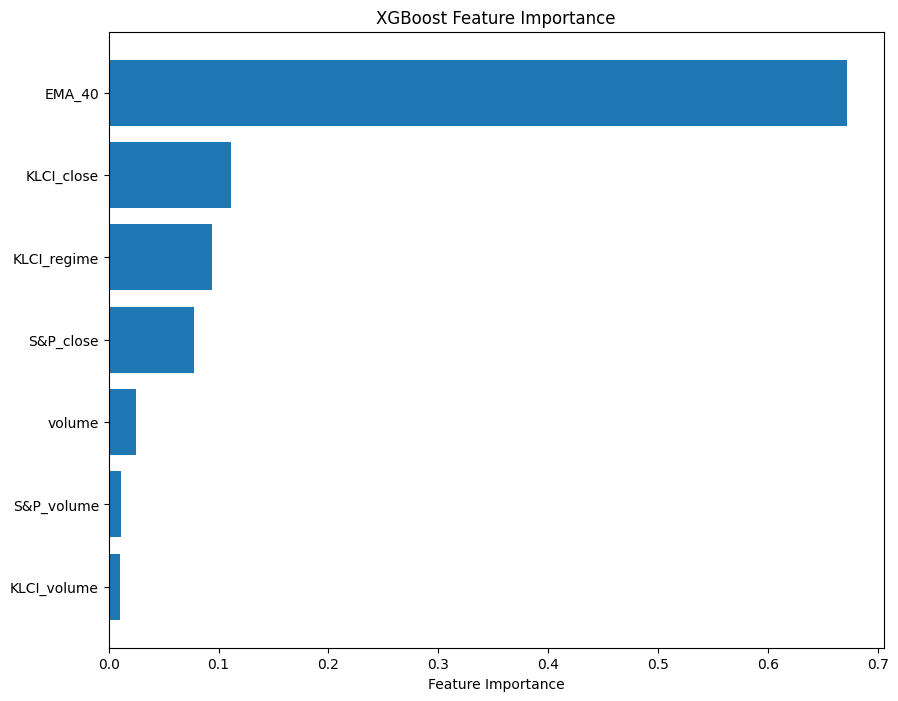

In [15]:
import xgboost as xgb

X = df[col]          # Features
y = df['close']      # Target

model = xgb.XGBRegressor(eval_metric='rmse')  # Use regression-specific model
model.fit(X, y)

# Get feature importances
importance_df = pd.DataFrame({
    'Feature': col,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")

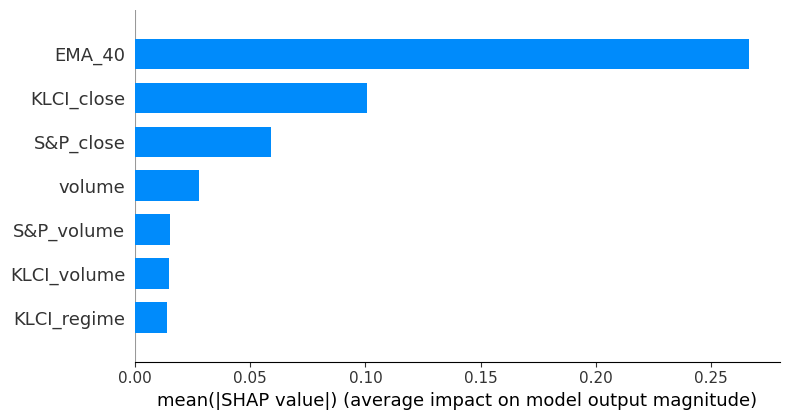

       Feature  Importance
1       EMA_40    0.266656
2   KLCI_close    0.100615
4    S&P_close    0.059087
0       volume    0.027542
5   S&P_volume    0.015155
3  KLCI_volume    0.014567
6  KLCI_regime    0.013833


In [20]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd

# Assuming you have already trained your model
model = xgb.XGBRegressor(eval_metric='rmse')  # Use regression-specific model
model.fit(X, y)  # Replace X, y with your dataset

# Use SHAP to explain the predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize the feature importance as a bar plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Save feature importance to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values).mean(axis=0)  # Mean of absolute SHAP values
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

Available features: Index(['volume', 'EMA_40', 'KLCI_close', 'KLCI_volume', 'S&P_close',
       'S&P_volume', 'KLCI_regime'],
      dtype='object')
Top feature: EMA_40


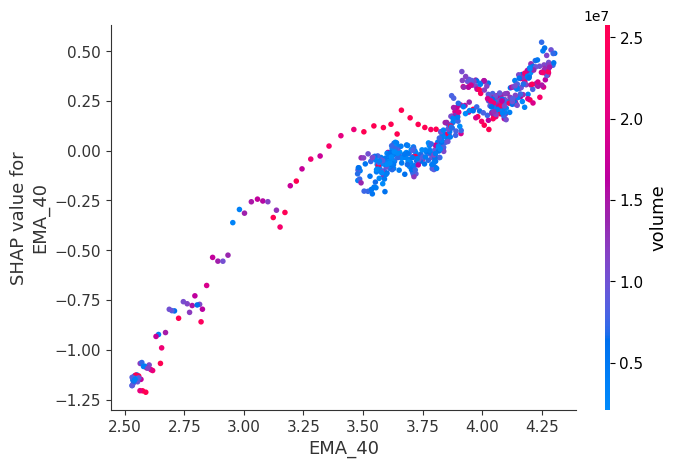

Top feature: KLCI_close


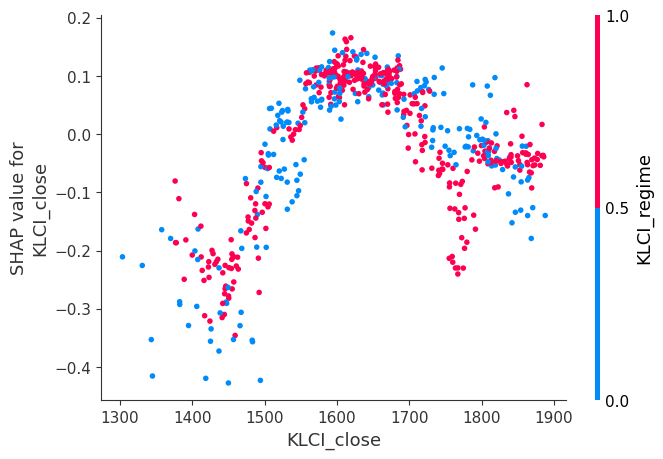

Top feature: S&P_close


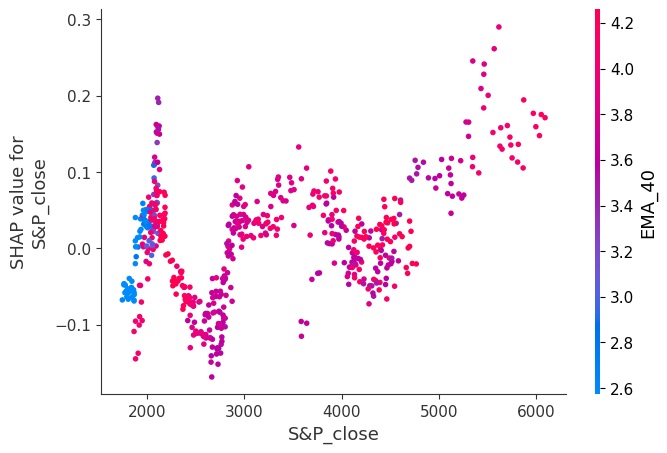

Top feature: volume


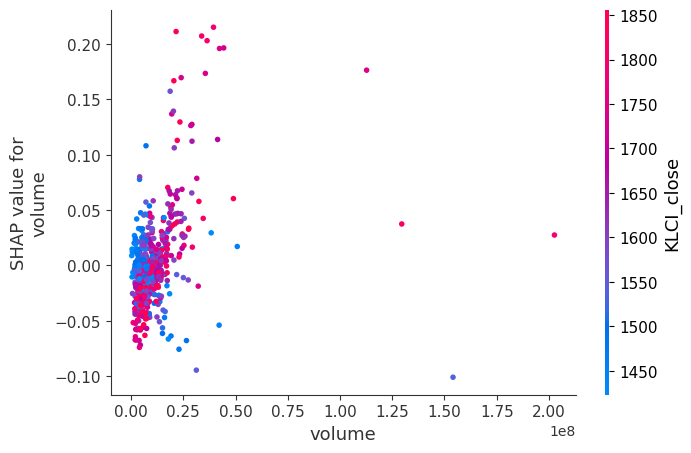

Top feature: S&P_volume


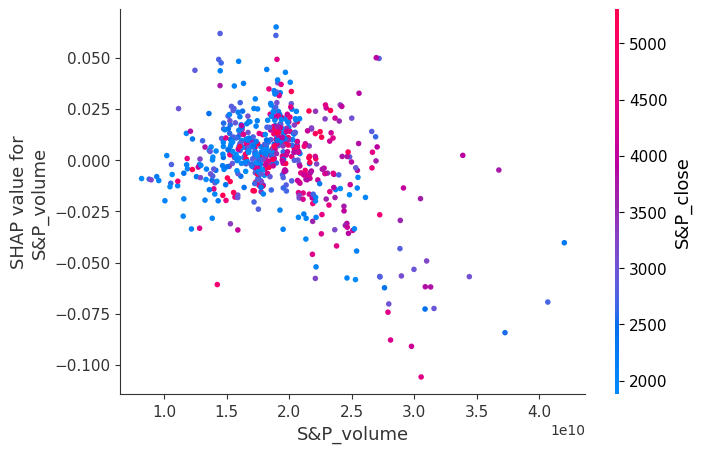

Top feature: KLCI_volume


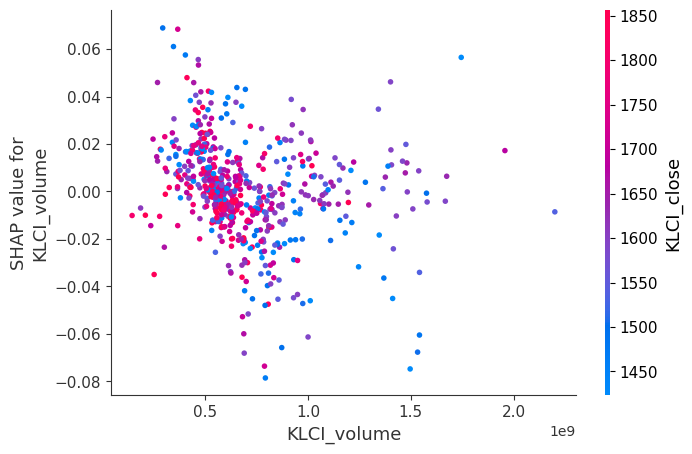

Top feature: KLCI_regime


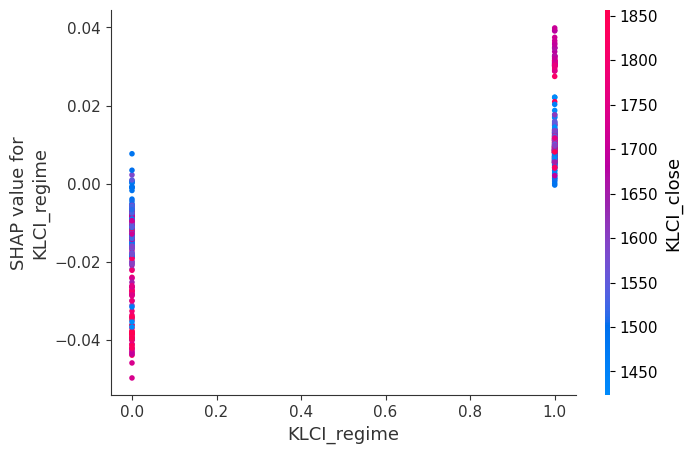

In [25]:
# Check feature names
print("Available features:", X.columns)

for i in range(len(X.columns)):
    # Use the most important feature for the dependence plot
    top_feature = feature_importance_df.iloc[i]['Feature']
    print("Top feature:", top_feature)
    
    # Create the dependence plot
    shap.dependence_plot(top_feature, shap_values, X)